In [585]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [430]:
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns


In [279]:
from google.colab import files
uploaded = files.upload()

Saving weeklycrct.xlsx to weeklycrct (2).xlsx


In [431]:
data = pd.read_excel ('weeklycrct.xlsx')


In [432]:
data.isnull().sum(axis = 0)


From Date    0
PM2.5        0
NO           0
NO2          0
NOx          0
NH3          0
SO2          0
Ozone        0
PM2.5y1      2
NOy1         2
NO2y1        2
NOxy1        2
NH3y1        2
SO2y1        2
Ozoney1      2
PM2.5y2      2
NOy2         2
NO2y2        2
NOxy2        2
NH3y2        2
SO2y2        2
Ozoney2      2
PM2.5y3      1
NOy3         1
NO2y3        1
NOxy3        1
NH3y3        1
SO2y3        1
Ozoney3      1
dtype: int64

In [433]:
data = data.fillna(data.median())


In [434]:
data.isnull().sum(axis = 0)


From Date    0
PM2.5        0
NO           0
NO2          0
NOx          0
NH3          0
SO2          0
Ozone        0
PM2.5y1      0
NOy1         0
NO2y1        0
NOxy1        0
NH3y1        0
SO2y1        0
Ozoney1      0
PM2.5y2      0
NOy2         0
NO2y2        0
NOxy2        0
NH3y2        0
SO2y2        0
Ozoney2      0
PM2.5y3      0
NOy3         0
NO2y3        0
NOxy3        0
NH3y3        0
SO2y3        0
Ozoney3      0
dtype: int64

In [435]:

data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [436]:
import datetime as dt

In [437]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [438]:
df=data.loc['0':'207']

In [439]:
df

,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3,year,month,day
0,735966,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333,2016,1,3
1,735973,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000,2016,1,10
2,735980,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857,2016,1,17
3,735987,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714,2016,1,24
4,735994,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571,2016,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,737387,101.091429,51.498571,58.585714,64.812857,15.740000,8.118571,29.711429,106.172857,54.095714,57.744286,55.042857,37.981429,4.904286,23.264286,142.857143,80.625714,45.074286,74.138571,49.790000,3.578571,16.118571,149.784286,121.402857,75.078571,138.612857,203.751429,11.587746,17.128777,2019,11,24
204,737394,63.288571,53.741429,50.064286,75.085714,12.037143,2.608571,19.504286,173.848571,143.770000,63.578571,151.897143,52.612857,5.732857,18.121429,144.028571,45.332857,45.222857,75.832857,37.271429,5.592857,26.178571,147.950000,81.650000,60.125714,98.311429,152.627143,11.661439,16.815036,2019,12,1
205,737401,143.041429,60.198571,56.500000,91.804286,19.447143,6.052857,22.581429,154.002857,123.677143,66.648571,122.448571,61.412857,5.291429,16.441429,152.064286,134.887143,36.749524,144.431513,58.198571,4.803483,17.601753,74.350000,164.774286,69.271429,170.718571,248.184286,11.735132,16.501295,2019,12,8
206,737408,139.978571,70.320000,74.011429,98.191429,10.748571,5.511429,17.747143,155.460000,51.312857,44.624286,43.031429,36.337143,5.230000,9.402857,95.821429,61.235714,25.596190,83.172353,43.650000,3.976781,20.910985,279.941429,132.675714,66.684286,143.141429,215.230000,11.808825,16.187554,2019,12,15


In [440]:
df.columns

Index(['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day'],
      dtype='object')

In [441]:
X1 = df[['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day']]
Y1 = df['NOx']

In [442]:
X1

,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3,year,month,day
0,735966,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333,2016,1,3
1,735973,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000,2016,1,10
2,735980,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857,2016,1,17
3,735987,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714,2016,1,24
4,735994,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571,2016,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,737387,101.091429,51.498571,58.585714,64.812857,15.740000,8.118571,29.711429,106.172857,54.095714,57.744286,55.042857,37.981429,4.904286,23.264286,142.857143,80.625714,45.074286,74.138571,49.790000,3.578571,16.118571,149.784286,121.402857,75.078571,138.612857,203.751429,11.587746,17.128777,2019,11,24
204,737394,63.288571,53.741429,50.064286,75.085714,12.037143,2.608571,19.504286,173.848571,143.770000,63.578571,151.897143,52.612857,5.732857,18.121429,144.028571,45.332857,45.222857,75.832857,37.271429,5.592857,26.178571,147.950000,81.650000,60.125714,98.311429,152.627143,11.661439,16.815036,2019,12,1
205,737401,143.041429,60.198571,56.500000,91.804286,19.447143,6.052857,22.581429,154.002857,123.677143,66.648571,122.448571,61.412857,5.291429,16.441429,152.064286,134.887143,36.749524,144.431513,58.198571,4.803483,17.601753,74.350000,164.774286,69.271429,170.718571,248.184286,11.735132,16.501295,2019,12,8
206,737408,139.978571,70.320000,74.011429,98.191429,10.748571,5.511429,17.747143,155.460000,51.312857,44.624286,43.031429,36.337143,5.230000,9.402857,95.821429,61.235714,25.596190,83.172353,43.650000,3.976781,20.910985,279.941429,132.675714,66.684286,143.141429,215.230000,11.808825,16.187554,2019,12,15


In [443]:
Y1

0       97.560000
1      107.217460
2       47.072540
3       42.129093
4       64.528246
          ...    
203     64.812857
204     75.085714
205     91.804286
206     98.191429
207     55.842857
Name: NOx, Length: 208, dtype: float64

In [38]:
from google.colab import files
files.download('weeklycrct.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [556]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state= 36)


In [557]:
forest =  RandomForestRegressor(n_estimators=1500,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=7,random_state=20)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=7, min_samples_split=7,
                      n_estimators=1500, random_state=20)

In [558]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.9959046364107196

Score on test data: 0.9850643505919839

Root Mean Squared Error: 5.75330416553643

Overall model accuracy: 0.9850643505919839


In [559]:
#test=data.loc['207':'219']
#test=data.loc['220':'222']
#test=data.loc['223':'227']
#test=data.loc['228':'229']
test=data.loc['230':'256']
X=test[['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day']]

In [560]:
predict=forest.predict(X)

In [561]:
predict

array([48.08788909, 45.2973872 , 46.70244269, 44.54918499, 40.68337742,
       45.35358709, 38.80108102, 45.14303017, 46.62958422, 57.02364918,
       53.07818639, 62.57865202, 62.79003836, 64.57455344, 42.0330233 ,
       28.56727943, 34.77587247, 37.79142617, 28.64480328, 38.22806843,
       42.50309036, 50.24442762, 47.9922248 , 83.83520727, 81.68285105,
       39.31024391, 51.97698378])

In [562]:
#dates=data.loc['212':'219','From Date']
#dates=data.loc['220':'222','From Date']
#dates=data.loc['223':'227','From Date']
#dates=data.loc['228':'229','From Date']
dates=data.loc['230':'256','From Date']

In [563]:
X['From Date']= dates.values

In [564]:
X.columns

Index(['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day'],
      dtype='object')

In [565]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [566]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [567]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [568]:
X['pred']=predict

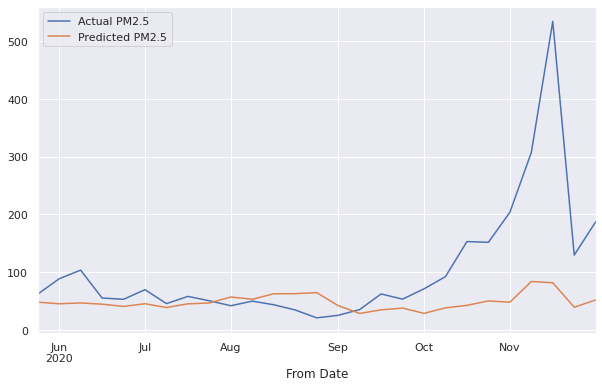

In [569]:
test['PM2.5'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM2.5')

In [570]:
np.sqrt(mean_squared_error(test['PM2.5'],X['pred']))

112.82627005827064

In [571]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 3.2052628471827727
MSE: 33.100508821178835
RMSE: 5.75330416553643
R-Squared: 0.9850643505919839


In [572]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 63.93937260082474
MSE: 12729.767215261818
RMSE: 112.82627005827064
R-Squared: -0.1312138165813741


# 3rd plot

In [573]:
testcase = pd.DataFrame()

In [574]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [575]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [576]:
testcase

,test,pred,Corrected
167,34.210000,37.763051,32.009747
56,94.877838,94.944874,89.191570
188,8.938571,16.856717,11.103413
48,170.718571,167.733539,173.486843
92,60.292857,62.028023,56.274719
2,47.072540,46.906945,52.660249
14,94.883684,94.951752,89.198447
126,87.348571,88.220937,82.467633
104,39.109412,39.089194,44.842498
28,137.381298,145.843580,140.090276


In [577]:
"""testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')"""

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [578]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.9858546068480766

In [579]:
test2020=pd.DataFrame()

In [580]:
test2020['test']=test['PM2.5']
test2020['pred']=X['pred']

In [581]:
test2020.index=test.index

In [582]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

In [583]:
test2020

,test,pred,Corrected
From Date,,,
2020-05-31,61.962857,48.087889,53.841193
2020-06-07,88.582857,45.297387,51.050691
2020-06-14,103.550000,46.702443,52.455747
2020-06-21,55.234286,44.549185,50.302489
2020-06-28,53.028571,40.683377,46.436682
2020-07-05,69.645714,45.353587,51.106891
2020-07-12,45.554286,38.801081,44.554385
2020-07-19,58.058571,45.143030,50.896334
2020-07-26,50.441429,46.629584,52.382888


In [584]:
test2020["Corrected"].describe()

count    27.000000
mean     51.673248
std      12.603595
min      34.320584
25%      44.808967
50%      51.050691
75%      54.919463
max      89.588511
Name: Corrected, dtype: float64

In [275]:
test2020["Corrected"].min()

17.791416020923368

In [276]:
test2020["Corrected"].max()

268.68336964492545

In [115]:
test2020["Corrected"].mean()

136.54028529672857

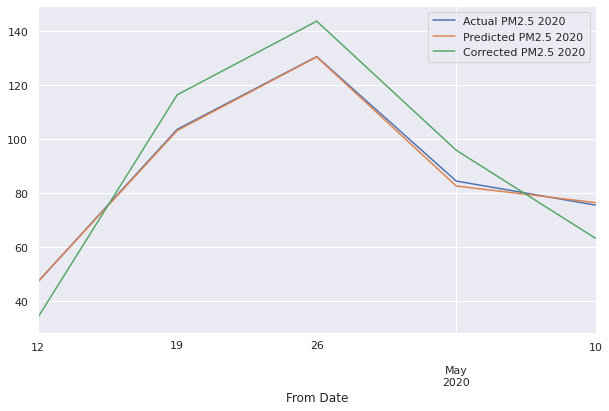

In [216]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [109]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.9209768140970864

In [111]:
test2020[corrected].median() 

NameError: ignored